<a href="https://colab.research.google.com/github/nambelaas/DataMining/blob/main/Implementasi_KMeans_dengan_dataku_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library yang di butuhkan
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

In [ ]:
#Baca dataset dari file
datasetPath = "Dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter=" ")

In [ ]:
#mendefinisikan parameter KMeans klustering
k=2 #jml klaster yg diinginkan
iterationCounter = 0 #counter untuk iterasi
input = dataset #input data

#fungsi untuk inisialisasi titik pusat klaster (random)
def initCentroid(dataIn, k):
  result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
  return result

In [ ]:
#fungsi untuk plot hasil kluster per iterasi
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
  n = listClusterMembers.__len__()
  color = iter(cm.rainbow(np.linspace(0, 1, n)))
  plt.figure("result")
  plt.clf()
  plt.title("iteration-" + iteration)
  marker = itertools.cycle(('.','*','^','x','+'))
  for i in range(n):
    col = next(color)
    memberCluster = np.asmatrix(listClusterMembers[i])
    plt.scatter(np.ravel(memberCluster[:,0]),np.ravel(memberCluster[:, 1]),
                marker=marker.__next__(), s=100, c=col, label="klaster-" +str(i+1))
  for i in range(n):
    plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__(),
                c=col, label="centroid-" + str(i+1))
    
  if(converged ==0):
    plt.legend()
    plt.ion()
    plt.show()

  if(converged ==1):
    plt.legend()
    plt.show(block=True)

In [ ]:
#fungsi utama algoritma k-means
def kMeans(data, centroidInit):
  nCluster = k #banyaknya klaster
  global iterationCounter
  centroidInit = np.matrix(centroidInit)
  #looping hingga konvergen
  while(True):
    iterationCounter += 1
    euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0],0))
    #ulangi proses untuk semua klaster
    for i in range(0, nCluster):
      centroidRepeated = np.repeat(centroidInit[i, :], data.shape[0], axis=0)
      deltaMatrix = abs(np.subtract(data, centroidRepeated))
      #hitung jarak euclidean
      euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
      euclideanMatrixAllCluster = \
        np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)
    #tempatkan data ke klaster yang jarak euclidean plg dekat
    clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
    listClusterMember = [[] for i in range(k)]
    for i in range(0, data.shape[0]): #assign data to cluster regarding cluster matrix
      listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])
    #hitung titik pusat klaster terbaru
    newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
    for i in range(0,nCluster):
      memberCluster = np.asmatrix(listClusterMember[i])
      centroidCluster = memberCluster.mean(axis=0)
      newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
    print("iter ", iterationCounter)
    print("centroid: ", newCentroid)
    #break dari loop jika sudah konvergen
    if((centroidInit==newCentroid).all()):
      break
    #update titik pusat klaster dengan nilai yang baru
    centroidInit = newCentroid
    #plot hasil klaster per iterasi
    plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
    time.sleep(1) #diberi jeda 1 detik agar hasil plot klaster nyaman dilihat
  return listClusterMember, centroidInit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument o

iter  6
centroid:  [[-1.00098636 -4.8917404 ]
 [ 0.2655099   4.93591485]]


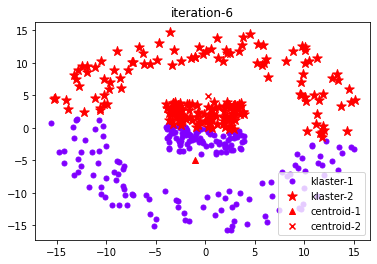

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter  7
centroid:  [[-0.96237629 -5.00115258]
 [ 0.2045568   4.84812524]]


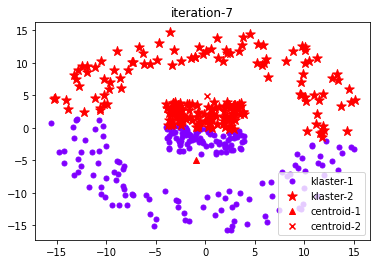

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter  8
centroid:  [[-0.89622304 -5.08809215]
 [ 0.12735072  4.7862    ]]


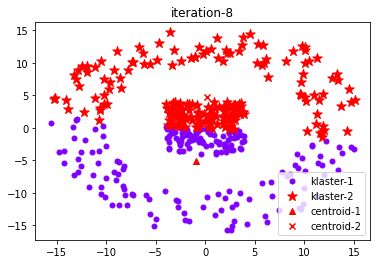

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter  9
centroid:  [[-0.69425508 -5.21832674]
 [-0.06918592  4.71510469]]


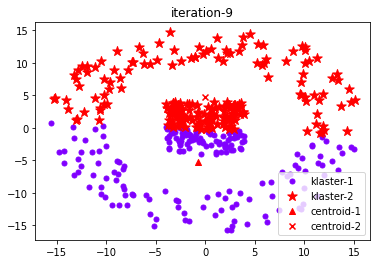

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter  10
centroid:  [[-0.64338852 -5.3329541 ]
 [-0.12360461  4.62866728]]


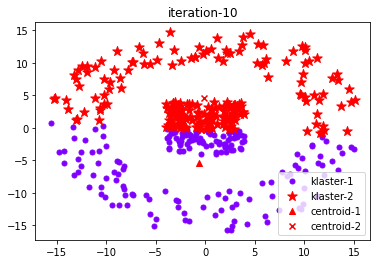

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter  11
centroid:  [[-0.49635281 -5.4836118 ]
 [-0.25320495  4.52510405]]


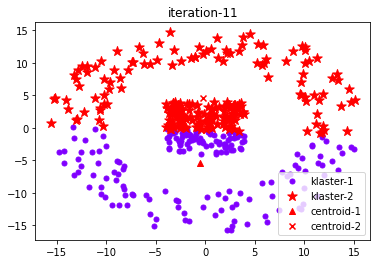

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter  12
centroid:  [[-0.32173851 -5.60854253]
 [-0.39194602  4.44414425]]


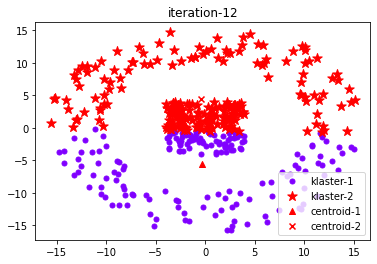

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter  13
centroid:  [[-0.18662601 -5.64019711]
 [-0.49460793  4.4239837 ]]


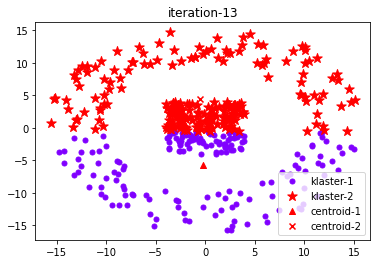

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter  14
centroid:  [[ 0.07734253 -5.60765575]
 [-0.6992031   4.4434615 ]]


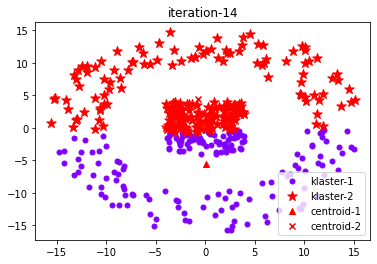

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter  15
centroid:  [[ 0.24691744 -5.65492035]
 [-0.82031623  4.39094956]]


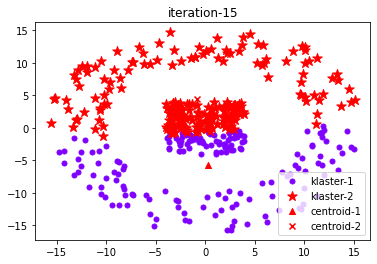

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter  16
centroid:  [[ 0.39858176 -5.70107353]
 [-0.92313565  4.33770739]]


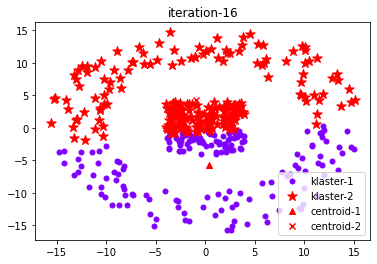

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter  17
centroid:  [[ 0.47802882 -5.69230412]
 [-0.98185739  4.33122565]]


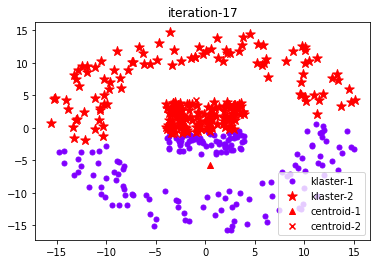

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter  18
centroid:  [[ 0.47802882 -5.69230412]
 [-0.98185739  4.33122565]]


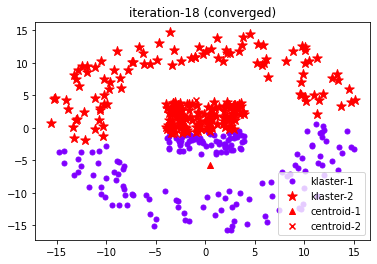

In [ ]:
#panggil fungsi inisialisasi klaster
centroidInit = initCentroid(input, k)
#panggil fungsi k-means
clusterResults, centroid = kMeans(input, centroidInit)
#plot hasil final klaster setelah konvergen
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged)", 1)